In [1]:
import os
import random
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Picking a Random Folder

In [2]:
# pick a random folder
folder = random.choice([name for name in os.listdir('Data_MIT/')])
folder

'01889'

## Reading the JSON Files

In [3]:
path = 'Data_MIT/' + folder

# Face Crop
with open(path + '/appleFace.json', 'r') as file:
    face = json.load(file)
    
# Left Eye
with open(path + '/appleLeftEye.json', 'r') as file:
    eye_l = json.load(file)

# Right Eye
with open(path + '/appleRightEye.json', 'r') as file:
    eye_r = json.load(file)

# Face Grid
with open(path + '/faceGrid.json', 'r') as file:
    grid = json.load(file)


## Picking a Random File

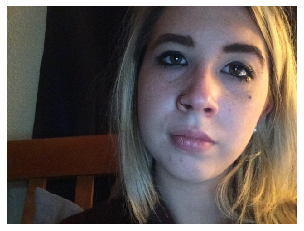

In [4]:
# make a list of invalid Frames in the Folder
indices = [i for i, x in enumerate(face['IsValid']) if x == 0]
indices += [i for i, x in enumerate(eye_l['IsValid']) if x == 0]
indices += [i for i, x in enumerate(eye_r['IsValid']) if x == 0]
indices += [i for i, x in enumerate(grid['IsValid']) if x == 0]

indices = list(set(indices))

# pick a random file
path = 'Data_MIT/' + folder + '/frames/'
files = [name for name in os.listdir(path)]

idx = indices[0]
while idx in indices:
    file = random.choice(files)
    idx = files.index(file)

# plot the frame    
img = cv2.cvtColor(cv2.imread(path + files[idx]), cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

## Plots

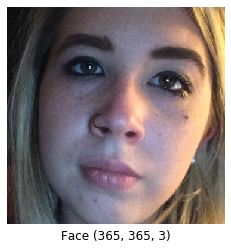

In [5]:
crop = img[round(face['Y'][idx]):round(face['Y'][idx])+round(face['H'][idx]),
           round(face['X'][idx]):round(face['X'][idx])+round(face['W'][idx])]

txt = 'Face ' + str(crop.shape)

plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(crop);

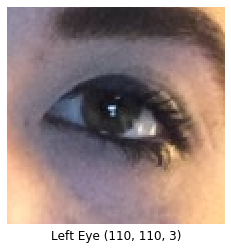

In [6]:
eyel = crop[round(eye_l['Y'][idx]):round(eye_l['Y'][idx])+round(eye_l['H'][idx]),
            round(eye_l['X'][idx]):round(eye_l['X'][idx])+round(eye_l['W'][idx])]

txt = 'Left Eye ' + str(eyel.shape)

plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(eyel);

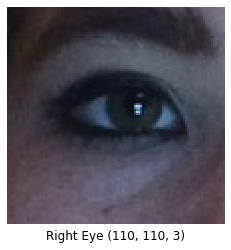

In [7]:
eyer = crop[round(eye_r['Y'][idx]):round(eye_r['Y'][idx])+round(eye_r['H'][idx]),
            round(eye_r['X'][idx]):round(eye_r['X'][idx])+round(eye_r['W'][idx])]

txt = 'Right Eye ' + str(eyer.shape)

plt.axis('off')
plt.title(txt, y=-.1)
plt.imshow(eyer);

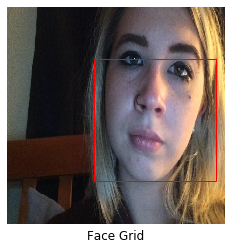

In [8]:
fig, ax = plt.subplots()


gridf = patches.Rectangle((round(grid['X'][idx]),round(grid['Y'][idx])),
                           round(grid['W'][idx]),round(grid['H'][idx]),
                          linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(gridf)

ax.axis('off')
plt.title('Face Grid', y=-.1)
ax.imshow(img, extent=[0,25,0,25]);

## The Frame

In [9]:
path + files[idx]

'Data_MIT/01889/frames/01315.jpg'